# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

**Since I work in Network Management at Swiss Int. Air Lines, I will write an example from the perspective of my day-to-day work:**

**Who**  
The target audience for my data story is **stakeholders in the airline industry**, particularly **network planners and scheduling teams** at **SWISS International Air Lines**. They have a strong understanding of aviation operations but may need insights into market trends and performance metrics.  

**What**  
I want my audience to understand **how recent scheduling and network decisions have impacted operational efficiency and profitability**. The goal is to **highlight trends in passenger demand, route profitability, and slot utilization**, enabling decision-makers to optimize future scheduling.  

**How**  
I will communicate my insights through **a concise data visualization report**, supplemented with **interactive charts in Python using Matplotlib and Pandas**. This report will be shared via **email and a live presentation**, allowing for deeper discussion and quick decision-making.  


# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

**1. Information about the dataset I chose**

The **Bank Customer Segmentation** dataset on Kaggle provides a collection of customer demographics and transaction data from an Indian bank. This dataset includes over a million transactions, capturing details such as customer age, gender, location, account balance, and transaction amounts. By analyzing these variables, one could identify distinct customer segments and understand their unique behaviors and preferences. This segmentation is crucial for financial institutions aiming to tailor their services effectively, enhance customer satisfaction, and reduce the chance of customer churning. The dataset's extensive scope offers valuable insights into customer interactions, enabling banks to develop targeted approaches that meet the specific needs of different client groups and foster stronger customer relationships.

Link:
https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation

**2. Summarize the dataset using info() and describe()**

In [2]:
# Load the dataset
df = pd.read_csv("week2_bank_transactions.csv")

# Display dataset info
df.info()

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


**3. Are there any duplicate rows?**

In [3]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Print the result
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


**4.Are there any duplicate values in a given column?**

In [4]:
# I will specifically check for duplicates in the "CustomerID" column as it is critical that each value is unique.

# Specify the column to check for duplicates
column_name = "CustomerID"  # Change this to any column you want to check

# Count duplicate values in the specified column
duplicate_values = df[column_name].duplicated().sum()

# Print the result
print(f"Number of duplicate values in '{column_name}': {duplicate_values}")

Number of duplicate values in 'CustomerID': 164302


In [5]:
# Since there are some duplicates I will need to drop some rows.

# Drop duplicate rows based on 'CustomerID' and keep the first occurrence
df_unique = df.drop_duplicates(subset=['CustomerID'], keep='first')

# Print the number of rows before and after removing duplicates
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing duplicates: {len(df_unique)}")

Original number of rows: 1048567
Number of rows after removing duplicates: 884265


**5. What are the mean, median, and mode of each column?**

In [6]:
# Calculate mean, median, and mode for each numerical column
mean_values = df_unique.select_dtypes(include=['number']).mean()
median_values = df_unique.select_dtypes(include=['number']).median()

# Since pandas' mode returns multiple values in some cases, we ensure we take only the first mode value
mode_values = df_unique.select_dtypes(include=['number']).mode().iloc[0]

# Display the results
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

# Print the summary statistics
print(summary_stats)

                                  Mean     Median      Mode
CustAccountBalance       114824.517201   16780.16       0.0
TransactionTime          157105.772589  164217.00  195708.0
TransactionAmount (INR)    1578.020192     460.00     100.0


**6.Are there any missing or null values?**

In [7]:
missing_values = df_unique.isnull().sum()

# Print only columns that have missing values
missing_values = missing_values[missing_values > 0]

# Display the result
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
CustomerDOB           2834
CustGender             937
CustLocation           134
CustAccountBalance    2018
dtype: int64


To have a clean dataset for any kind of further analysis, I will drop rows where CustomerDOB, CustGender, or CustLocation is missing or zero.

In [8]:
# Drop rows where CustomerDOB, CustGender, or CustLocation is missing or zero
df_cleaned = df_unique[
    (df_unique['CustomerDOB'].notnull()) &
    (df_unique['CustGender'].notnull()) &
    (df_unique['CustLocation'].notnull()) &
    (df_unique['CustomerDOB'] != 0) &
    (df_unique['CustGender'] != 0) &
    (df_unique['CustLocation'] != 0)
]

# Print the number of rows before and after cleaning
print(f"Number of rows before cleaning: {len(df_unique)}")
print(f"Number of rows after cleaning: {len(df_cleaned)}")


Number of rows before cleaning: 884265
Number of rows after cleaning: 880412


**7. Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born)**

In [9]:
# I want to check, if all the birth dates are reasonable.

# Attempt automatic date parsing with multiple formats
df_cleaned['CustomerDOB'] = pd.to_datetime(df_cleaned['CustomerDOB'], dayfirst=True, errors='coerce')

# Define realistic date range
min_birth_date = datetime(1920, 1, 1)  # Assuming no one is older than 104 years
max_birth_date = datetime(2024, 1, 1)  # No future birthdates

# Find unrealistic birthdates again
unrealistic_dobs = df_cleaned[(df_cleaned['CustomerDOB'] < min_birth_date) | (df_cleaned['CustomerDOB'] > max_birth_date)]

# Print results
print(f"Number of unrealistic CustomerDOB values: {len(unrealistic_dobs)}")
print(unrealistic_dobs[['CustomerID', 'CustomerDOB']])

/tmp/ipykernel_19148/3457150455.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['CustomerDOB'] = pd.to_datetime(df_cleaned['CustomerDOB'], dayfirst=True, errors='coerce')


Number of unrealistic CustomerDOB values: 136217
        CustomerID CustomerDOB
1         C2142763  2057-04-04
3         C5342380  2073-09-14
5         C1536588  2072-10-08
15        C8334633  2068-07-10
16        C1376215  1800-01-01
...            ...         ...
1048500   C1619019  2051-07-01
1048504   C3321544  2070-12-18
1048510   C3429427  2048-07-15
1048531   C6937679  1800-01-01
1048552   C5091732  2071-08-21

[136217 rows x 2 columns]


/tmp/ipykernel_19148/3457150455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CustomerDOB'] = pd.to_datetime(df_cleaned['CustomerDOB'], dayfirst=True, errors='coerce')


In [10]:
# I want to drop all the rows with unrealistic birth dates

# Keep only rows with realistic CustomerDOB values
df_cleaned = df_cleaned[(df_cleaned['CustomerDOB'] >= min_birth_date) & (df_cleaned['CustomerDOB'] <= max_birth_date)]

# Print the number of rows after cleaning
print(f"Number of rows after dropping unrealistic birth dates: {len(df_cleaned)}")



Number of rows after dropping unrealistic birth dates: 744195


**8. Encode any categorical variables (e.g. with one-hot encoding.)**

In [11]:
# I think one specific column which makes sense to encode would be the gender column

# Perform one-hot encoding on CustGender and drop the original column
df_cleaned_encoded = pd.get_dummies(df_cleaned, columns=['CustGender'], drop_first=True)

# Print the first few rows to verify the encoding
print(df_cleaned_encoded.head())

  TransactionID CustomerID CustomerDOB CustLocation  CustAccountBalance  \
0            T1   C5841053  1994-01-10   JAMSHEDPUR            17819.05   
2            T3   C4417068  1996-11-26       MUMBAI            17874.44   
4            T5   C9031234  1988-03-24  NAVI MUMBAI             6714.43   
6            T7   C7126560  1992-01-26       MUMBAI              973.46   
7            T8   C1220223  1982-01-27       MUMBAI            95075.54   

  TransactionDate  TransactionTime  TransactionAmount (INR)  CustGender_M  
0          2/8/16           143207                     25.0         False  
2          2/8/16           142712                    459.0         False  
4          2/8/16           181156                   1762.5         False  
6          2/8/16           173806                    566.0         False  
7          2/8/16           170537                    148.0          True  


**9. Conclusion**



**1. Are the data usable?**
Yes, but some preprocessing was necessary.  
- The dataset contains meaningful transaction and customer information.
- I handled missing values and removed unrealistic birthdates.
- I encoded categorical variables (`CustGender`).
- There were duplicate entries, which I resolved.



**2. Do we need to modify or correct the data further?**
Minor fixes were needed, but the dataset is now clean.  
- **Date Format Issue:** The `CustomerDOB` column had inconsistent formats, but I fixed this.
- **Missing Values:** I dropped rows where critical fields (`CustomerDOB`, `CustGender`, `CustLocation`) were missing.
- **Duplicate Data:** Duplicates were removed based on `CustomerID`.



**3. Is there any class imbalance?**
Potential class imbalance in categorical features.  
- **`CustGender`**: If one gender significantly outnumbers the other, it might impact certain analyses.
- **`CustLocation`**: Some locations may dominate the dataset, leading to a bias in regional insights.
- **`TransactionAmount (INR)` Distribution:** If most transactions are small amounts but a few outliers are significantly high, this could skew analysis.

**Next Steps:**  
- Check the distribution of `CustGender` using `df_cleaned['CustGender'].value_counts()`.
- Check `CustLocation` imbalance using `df_cleaned['CustLocation'].value_counts()`.
- Visualize `TransactionAmount (INR)` distribution to spot any outliers.


**Final Verdict**
The dataset is now clean and usable for analysis.  
One should be aware of potential class imbalances before making conclusions based on customer demographics or transaction patterns.


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

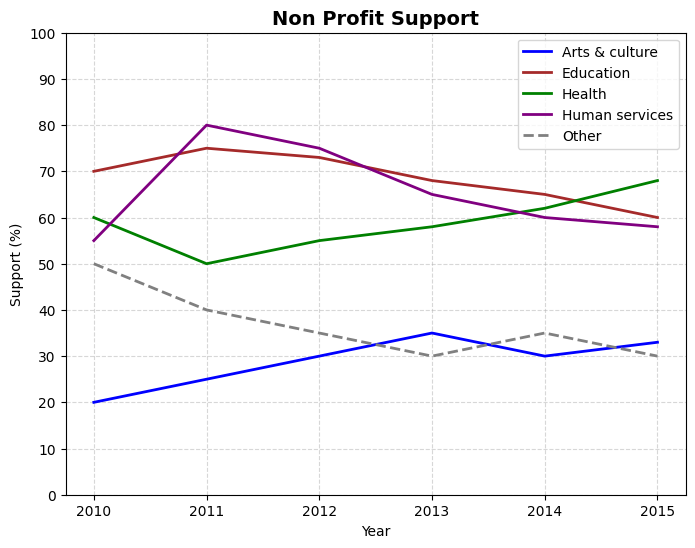

In [12]:
import matplotlib.pyplot as plt

# Sample years
years = np.arange(2010, 2016)

# Sample data (rough estimation from the graph)
arts_culture = [20, 25, 30, 35, 30, 33]
education = [70, 75, 73, 68, 65, 60]
health = [60, 50, 55, 58, 62, 68]
human_services = [55, 80, 75, 65, 60, 58]
other = [50, 40, 35, 30, 35, 30]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(years, arts_culture, label="Arts & culture", color='blue', linewidth=2)
plt.plot(years, education, label="Education", color='brown', linewidth=2)
plt.plot(years, health, label="Health", color='green', linewidth=2)
plt.plot(years, human_services, label="Human services", color='purple', linewidth=2)
plt.plot(years, other, label="Other", color='gray', linewidth=2, linestyle='dashed')

# Formatting the chart
plt.title("Non Profit Support", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Support (%)")
plt.xticks(years)
plt.yticks(np.arange(0, 110, 10))
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()
